In [ ]:
!pip install pyarrow==15.0.2 datasets seaborn nltk wordcloud contractions xformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:


In [ ]:
!pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.31.0 which is incompatible.


# **Data Pre Processing**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
from tqdm import tqdm
from multiprocessing import Pool
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, \
roc_auc_score, roc_curve, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/IMDB Dataset.csv')
#Let's check the samples of data
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# Randomly sample 100 rows from the DataFrame
sample_df = df.sample(n=100, random_state=42)

# Create a new DataFrame by dropping the sampled rows
df = df.drop(sample_df.index)

# Reset the index of the filtered DataFrame
df = df.reset_index(drop=True)

# Export the filtered DataFrame to an Excel file
sample_df.to_excel('100_testRows_movies.xlsx', index=False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49900 entries, 0 to 49899
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49900 non-null  object
 1   sentiment  49900 non-null  object
dtypes: object(2)
memory usage: 779.8+ KB


# Cleaning

In [ ]:
original_df = df.copy(deep=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Dimentions of the dataset & information about dataset
print('Dimentions of dataset:', df.shape)
#Checking the dtypes of all the columns
df.info()

Dimentions of dataset: (49900, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49900 entries, 0 to 49899
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49900 non-null  object
 1   sentiment  49900 non-null  object
dtypes: object(2)
memory usage: 779.8+ KB


In [ ]:
#Descriptive summary of dataset
df.describe()

,review,sentiment
count,49900,49900
unique,49484,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,24952


In [ ]:
#Let's check Null values
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
#Let's check Duplicates
df.duplicated().sum()

416

In [ ]:
duplicates = df[df.duplicated()]
duplicates

,review,sentiment
3531,Quite what the producers of this appalling ada...,negative
3763,My favourite police series of all time turns t...,positive
4381,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6336,If you liked the Grinch movie... go watch that...,negative
6463,I want very much to believe that the above quo...,negative
...,...,...
49812,This is an incredible piece of drama and power...,positive
49850,This was a very brief episode that appeared in...,negative
49884,Hello it is I Derrick Cannon and I welcome you...,negative
49886,This movie is a disgrace to the Major League F...,negative


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
#Let's check Null values
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
#Let's check Duplicates
df.duplicated().sum()

0

In [ ]:
# Assuming df is your DataFrame
df = df.reset_index(drop=True)  # Use drop=True to avoid adding the old index as a column

In [ ]:
# Let's get a word count
df['word_count'] = df['review'].apply(lambda x: len(str(x).split(" ")))
df[['review','word_count']].head()

,review,word_count
0,One of the other reviewers has mentioned that ...,307
1,A wonderful little production. <br /><br />The...,162
2,I thought this was a wonderful way to spend ti...,166
3,Basically there's a family where a little boy ...,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",230


In [ ]:
#Number of Characters- including spaces
df['char_count'] = df['review'].str.len() # this also includes spaces
df[['review','char_count']].head()


,review,char_count
0,One of the other reviewers has mentioned that ...,1761
1,A wonderful little production. <br /><br />The...,998
2,I thought this was a wonderful way to spend ti...,926
3,Basically there's a family where a little boy ...,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1317


In [ ]:
#Number of stop Words:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['review','stopwords']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,stopwords
0,One of the other reviewers has mentioned that ...,122
1,A wonderful little production. <br /><br />The...,62
2,I thought this was a wonderful way to spend ti...,70
3,Basically there's a family where a little boy ...,58
4,"Petter Mattei's ""Love in the Time of Money"" is...",92


In [ ]:
#Number of special character:
df['hastags'] = df['review'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['review','hastags']].head()

,review,hastags
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [ ]:
#Number of numerics:
df['numerics'] = df['review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['review','numerics']].head()

,review,numerics
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [ ]:
# Removing numerics
df['review'] = df['review'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))


In [ ]:
#Number of numerics:
df['numerics'] = df['review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['review','numerics']].head()

,review,numerics
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


WORDCLOUD

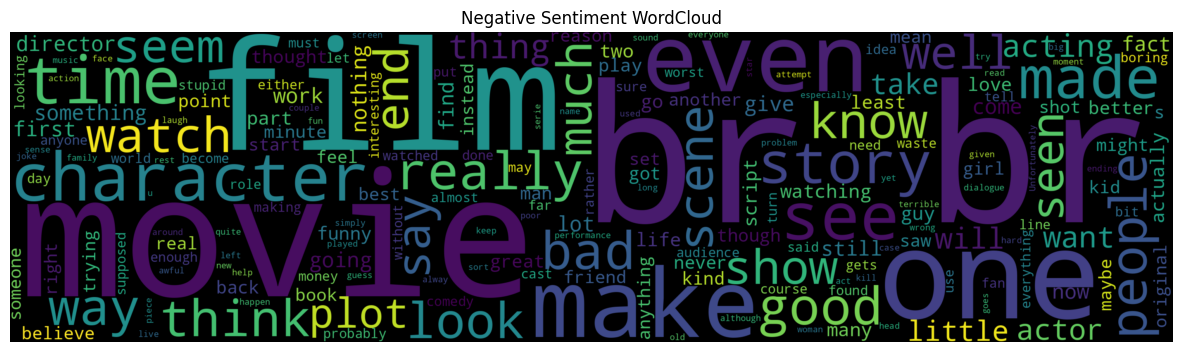

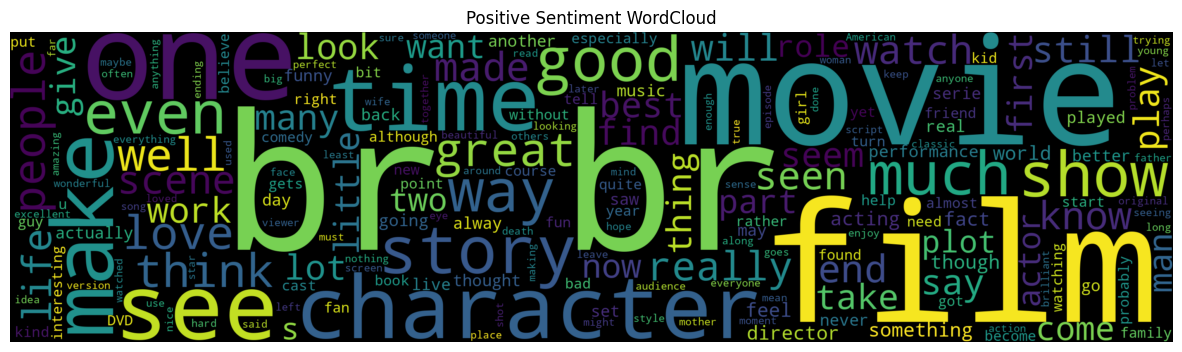

In [ ]:
from wordcloud import WordCloud, STOPWORDS
negative_df = df[df['sentiment'] == 'negative']
positive_df = df[df['sentiment'] == 'positive']


# Define a function to generate and display a WordCloud
def generate_wordcloud(data, title):
    words = ' '.join(data['review'])
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT' ])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',
                          width=3000, height=800).generate(cleaned_word)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
# Generate and display WordClouds for each sentiment category
generate_wordcloud(negative_df, 'Negative Sentiment WordCloud')
generate_wordcloud(positive_df, 'Positive Sentiment WordCloud')


BASIC PREPROCESSING

In [ ]:
!pip install nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
# Convert text to lowercase
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removal of punctuations
df['review'].str.replace('[^\w\s]','')

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['review'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review
0,one reviewers mentioned watching oz episode ho...
1,wonderful little production. <br /><br />the f...
2,thought wonderful way spend time hot summer we...
3,basically there's family little boy (jake) thi...
4,"petter mattei's ""love time money"" visually stu..."


In [ ]:
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
def remove_mentions_hashtags(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    return text
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

from contractions import fix

def expand_contractions(text):
    return fix(text)
def normalize_whitespace(text):
    return ' '.join(text.split())

def remove_specific_contractions(text):
    return re.sub(r"\b\w*'\w+\b", '', text)


In [ ]:
def clean_text(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_mentions_hashtags(text)
    text = remove_specific_contractions(text)
    text = expand_contractions(text)
    text = remove_special_characters(text)
    text = normalize_whitespace(text)
    return text

df['review'] = df['review'].apply(clean_text)


In [ ]:
df['review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment,word_count,char_count,stopwords,hastags,numerics
0,one reviewers mentioned watching oz episode ho...,positive,307,1761,122,0,0
1,wonderful little production the filming techni...,positive,162,998,62,0,0
2,thought wonderful way spend time hot summer we...,positive,166,926,70,0,0
3,basically family little boy jake thinks zombie...,negative,138,748,58,0,0
4,petter love time money visually stunning film ...,positive,230,1317,92,0,0


In [ ]:
# Display full content of the first 5 rows
with pd.option_context('display.max_columns', None, 'display.max_colwidth', None):
    print(df.head(5))

COMMON WORDS Checking

In [ ]:
freq = pd.Series(' '.join(df['review']).split()).value_counts()[:30]
freq

,count
movie,82904
film,73913
one,49947
like,38449
good,28267
even,24035
would,23987
time,23096
really,22676
see,22202


In [ ]:
#Rare Words checking
#This is done as association of these less occurring words with the existing words could be a noise
freq = pd.Series(' '.join(df['review']).split()).value_counts()[-10:]
freq

,count
sexthriller,1
zaroffs,1
suchat,1
wantone,1
spoilercrashing,1
americanparticularly,1
swarg,1
ankheinshola,1
chalta,1
yosemitei,1


In [ ]:
df['review']= df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['review'].head()

,review
0,one reviewers mentioned watching oz episode ho...
1,wonderful little production the filming techni...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake thinks zombie...
4,petter love time money visually stunning film ...


In [ ]:
#Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach¶
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['review'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

,review
0,one review mention watch oz episod hook right ...
1,wonder littl product the film techniqu unassum...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter love time money visual stun film watch ...


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,24834
negative,24650


                 Sentiment Variable Distribution                  


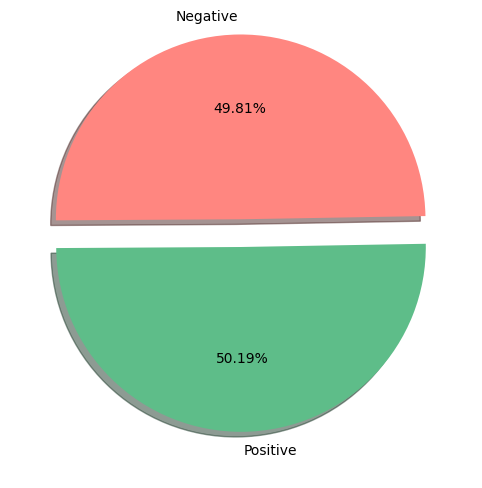

In [ ]:
#Let's look at the sentiment distribution of positive, negative sentiments
print('\033[1mSentiment Variable Distribution'.center(70))
plt.figure(figsize=(12, 6))
colors = ['#5ebd89', '#ff8680']
plt.pie(df['sentiment'].value_counts(), labels=['Positive', 'Negative'], counterclock=False, shadow=True,
        explode=[0, 0.15], autopct='%1.2f%%', radius=1, startangle=1, colors=colors)

plt.show()

AGAIN visualize after cleaning

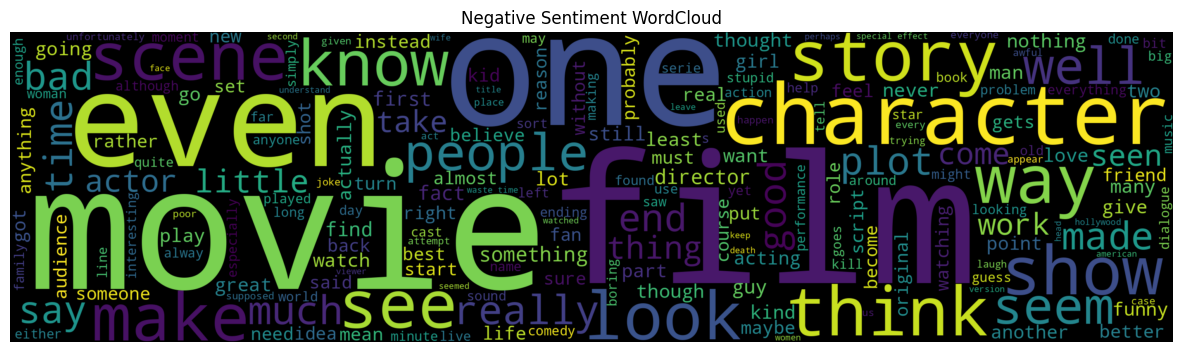

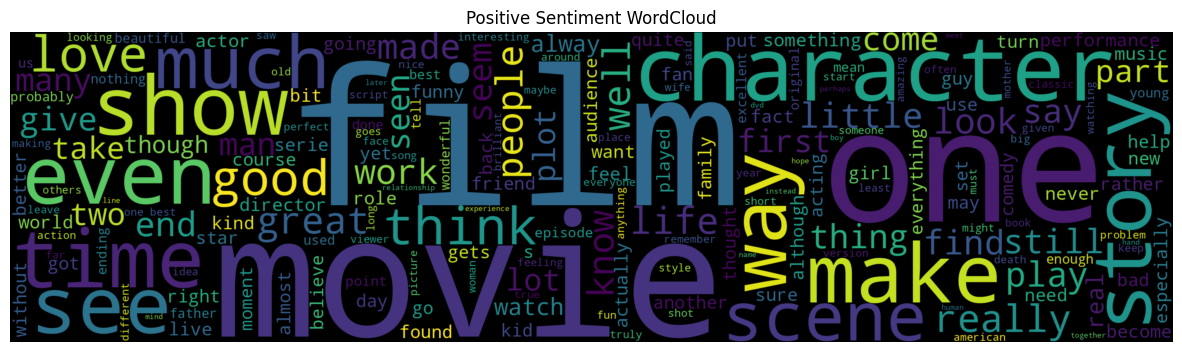

In [ ]:
from wordcloud import WordCloud, STOPWORDS
negative_df = df[df['sentiment'] == 'negative']
positive_df = df[df['sentiment'] == 'positive']


# Define a function to generate and display a WordCloud
def generate_wordcloud(data, title):
    words = ' '.join(data['review'])
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT' ])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',
                          width=3000, height=800).generate(cleaned_word)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
# Generate and display WordClouds for each sentiment category
generate_wordcloud(negative_df, 'Negative Sentiment WordCloud')
generate_wordcloud(positive_df, 'Positive Sentiment WordCloud')



In [ ]:
df.head()

,review,sentiment,word_count,char_count,stopwords,hastags,numerics
0,one reviewers mentioned watching oz episode ho...,positive,307,1761,122,0,0
1,wonderful little production the filming techni...,positive,162,998,62,0,0
2,thought wonderful way spend time hot summer we...,positive,166,926,70,0,0
3,basically family little boy jake thinks zombie...,negative,138,748,58,0,0
4,petter love time money visually stunning film ...,positive,230,1317,92,0,0


In [ ]:
#Number of stop Words:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['review','stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,stopwords
0,one reviewers mentioned watching oz episode ho...,6
1,wonderful little production the filming techni...,6
2,thought wonderful way spend time hot summer we...,0
3,basically family little boy jake thinks zombie...,1
4,petter love time money visually stunning film ...,1


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Download stopwords and punkt (tokenizer)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Define the stopwords removal function
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text.lower())
    filtered_text = ' '.join([word for word in word_tokens if word not in stop_words])
    return filtered_text

# Apply the function to the 'description' column
df['review'] = df['review'].apply(remove_stopwords)


In [ ]:
#Number of stop Words:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['review','stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,stopwords
0,one reviewers mentioned watching oz episode ho...,0
1,wonderful little production filming technique ...,0
2,thought wonderful way spend time hot summer we...,0
3,basically family little boy jake thinks zombie...,0
4,petter love time money visually stunning film ...,0


In [ ]:
df['stopwords'].value_counts()

,count
stopwords,
0,49484


In [ ]:
# Calculate the maximum length of values in 'text_column'
df['max_length'] = df['review'].apply(len)

# Find the maximum length
max_length = df['max_length'].max()

print("Maximum length:", max_length)

Maximum length: 9025


In [ ]:
# Let's get a word count
df['word_count'] = df['review'].apply(lambda x: len(str(x).split(" ")))
df[['review','word_count']].head()

,review,word_count
0,one reviewers mentioned watching oz episode ho...,160
1,wonderful little production filming technique ...,82
2,thought wonderful way spend time hot summer we...,82
3,basically family little boy jake thinks zombie...,63
4,petter love time money visually stunning film ...,122


In [ ]:
# Sort by word_count in descending order and display the top rows
sorted_df = df[['review', 'word_count']].sort_values(by='word_count', ascending=False).head(20)
sorted_df

,review,word_count
31248,match tag team table match bubba ray spike dud...,1387
31204,back midlate oav anime title bubblegum crisis ...,1111
31011,spoilers includedalthough many commentators ca...,1088
40168,sign lost highway saysmajor spoilers aheadbut ...,1032
12597,titanic directed james cameron presents fictio...,905
5692,attention spoilersfirst let say rob roy one be...,892
3018,anyone ever assembles compendium modern americ...,887
42566,probably heard bit new disney dub classic film...,861
43426,praised atlantisthelostempire disney adventure...,777
3647,spoilers begin let say advantages seeing movie...,766


In [ ]:
df[['review','word_count']].head()

,review,word_count
0,one reviewers mentioned watching oz episode ho...,160
1,wonderful little production filming technique ...,82
2,thought wonderful way spend time hot summer we...,82
3,basically family little boy jake thinks zombie...,63
4,petter love time money visually stunning film ...,122


In [ ]:
token_lens = []
from transformers import BertTokenizer
tokenizer= BertTokenizer.from_pretrained('bert-base-uncased')
for txt in df.review:
  tokens = tokenizer.encode(txt, max_length=1400)
  token_lens.append(len(tokens))

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


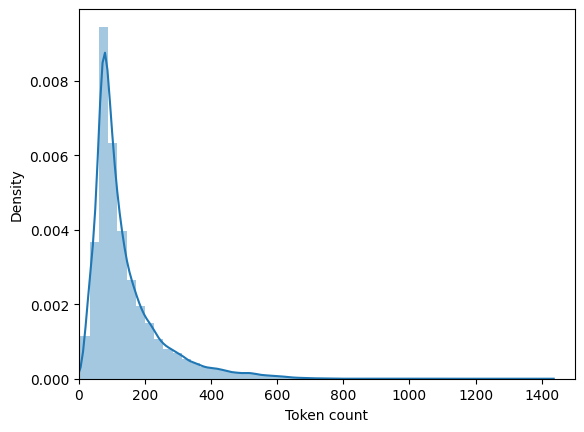

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 1500]);
plt.xlabel('Token count');

In [ ]:
df.head()

,review,sentiment,word_count,char_count,stopwords,hastags,numerics,max_length
0,one reviewers mentioned watching oz episode ho...,positive,160,1761,0,0,0,1112
1,wonderful little production filming technique ...,positive,82,998,0,0,0,637
2,thought wonderful way spend time hot summer we...,positive,82,926,0,0,0,573
3,basically family little boy jake thinks zombie...,negative,63,748,0,0,0,436
4,petter love time money visually stunning film ...,positive,122,1317,0,0,0,835


In [ ]:
# Modify the original DataFrame
df = df[df['word_count'] <= 400]

In [ ]:
# Sort by word_count in descending order and display the top rows
sorted_df = df[['review', 'word_count']].sort_values(by='word_count', ascending=False).head(100)
print(sorted_df)

                                                  review  word_count
1949   jim wynorski first announced would new sequel ...         400
22570  used movie college ethics courses years also w...         400
3038   important keep mind real meaning phrase inspir...         400
25401  understand fox embarrassed released pg alienpr...         400
5475   saw heartland first released seen improves age...         400
...                                                  ...         ...
32111  marie smooth dan smooth danif anything like sm...         390
26519  late early golden age adventure movies rise bu...         390
44107  finally see many consider greatest womeninpris...         389
43672  review nunsploitation films around since forev...         389
41767  ramin bahrani sets scene early chop shop immed...         389

[100 rows x 2 columns]


In [ ]:
df = df[['review', 'sentiment']]

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter love time money visually stunning film ...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48588 entries, 0 to 49483
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     48588 non-null  object
 1   sentiment  48588 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
# Assuming df is your DataFrame
df = df.reset_index(drop=True)  # Use drop=True to avoid adding the old index as a column

# **BERT Model**

In [ ]:
label_mapping = {
    'negative': 0,
    'positive': 1
}

# Apply the mapping to the review column
df['sentiment'] = df['sentiment'].map(label_mapping)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and text handling
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Deep Learning libraries (PyTorch)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler

# Transformers for BERT
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset

# Word Embeddings
import gensim

# NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
sns.set(style='whitegrid')

# Setting device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Load the pre-trained BERT tokenizer and model
tokenizer= BertTokenizer.from_pretrained('bert-base-uncased')
model= BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2) # 2 sentiment classes

# Encode the text data using the tokenizer
encoded_data= tokenizer.batch_encode_plus(df['review'].tolist(), max_length=400, padding=True, truncation=True, return_tensors='pt')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Split the data into training and test sets for BERT
input_ids= encoded_data['input_ids']
attention_masks= encoded_data['attention_mask']

labels = torch.tensor(df['sentiment'].values)

train_inputs, val_inputs, train_labels, val_labels= train_test_split(input_ids, labels, test_size= 0.2, random_state= 42)
train_masks, val_masks, _, _= train_test_split(attention_masks, input_ids, test_size= 0.2, random_state= 42)

In [ ]:
# Convert your data into the required format for the Dataset object
def convert_to_dataset(input_ids, attention_masks, labels):
    dataset = Dataset.from_dict({
        'input_ids': input_ids.numpy(),
        'attention_mask': attention_masks.numpy(),
        'labels': labels.numpy()
    })
    return dataset

In [ ]:
# Create the training and validation datasets
train_dataset= convert_to_dataset(train_inputs, train_masks, train_labels)
val_dataset= convert_to_dataset(val_inputs, val_masks, val_labels)

In [ ]:
# Use a data collator to handle padding
data_collator= DataCollatorWithPadding(tokenizer)

# Set up the training arguments
training_args= TrainingArguments(output_dir='./bert_output', num_train_epochs=1, per_device_train_batch_size=16, per_device_eval_batch_size=16, warmup_steps=500, weight_decay=0.01, logging_dir='./logs', report_to= 'none')

In [ ]:
# Create the trainer
trainer= Trainer(model= model, args= training_args, train_dataset= train_dataset, eval_dataset= val_dataset, data_collator= data_collator, tokenizer= tokenizer)

# Train the model
trainer.train()

Step,Training Loss
500,0.444000
1000,0.320800
1500,0.284700
2000,0.246300


TrainOutput(global_step=2430, training_loss=0.30839640299479165, metrics={'train_runtime': 2848.3065, 'train_samples_per_second': 13.647, 'train_steps_per_second': 0.853, 'total_flos': 7989942751440000.0, 'train_loss': 0.30839640299479165, 'epoch': 1.0})

In [ ]:
# Evaluate the BERT model
model.eval()
predictions= []
true_labels= []
mis_predictions_data = []  # List to store mispredictions

In [ ]:
# Create a DataLoader for the validation set
val_dataset = TensorDataset(val_inputs, val_masks, val_labels)
val_dataloader = DataLoader(val_dataset, batch_size=32)

In [ ]:
# Make predictions on the validation set
with torch.no_grad():
    for batch in val_dataloader:
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}
        outputs = model(**inputs)
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = batch[2].to('cpu').numpy()
        predictions.extend(np.argmax(logits, axis=1))
        true_labels.extend(label_ids)

In [ ]:
# Calculate evaluation metrics for BERT
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')

print(f'BERT - Accuracy: {accuracy:.2f}')
print(f'BERT - Precision: {precision:.2f}')
print(f'BERT - Recall: {recall:.2f}')
print(f'BERT - F1 Score: {f1:.2f}')

BERT - Accuracy: 0.91
BERT - Precision: 0.92
BERT - Recall: 0.91
BERT - F1 Score: 0.91


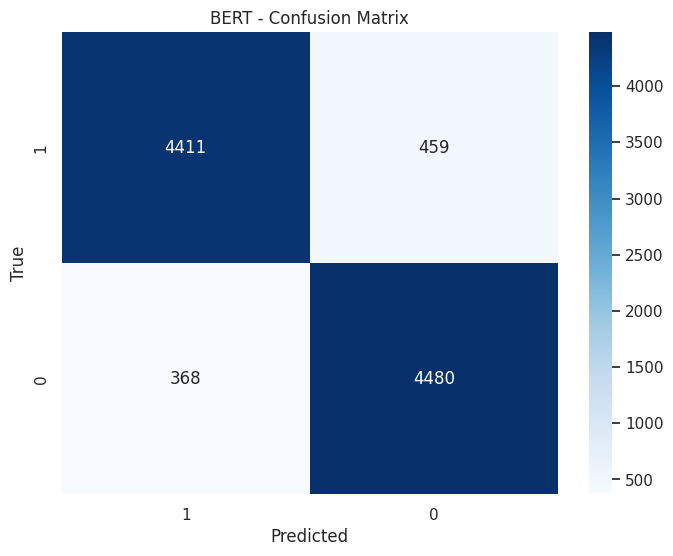

In [ ]:
# Generate and plot the confusion matrix for BERT
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['sentiment'].unique(), yticklabels=df['sentiment'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('BERT - Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Define the mapping dictionary
label_mapping = {0: 'negative', 1: 'positive'}

# Get the target names in the correct order
target_names = [label_mapping[i] for i in sorted(label_mapping.keys())]

# BERT Classification Report
print("BERT - Classification Report:\n", classification_report(true_labels, predictions, target_names=target_names))


BERT - Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.91      0.91      4870
    positive       0.91      0.92      0.92      4848

    accuracy                           0.91      9718
   macro avg       0.92      0.91      0.91      9718
weighted avg       0.92      0.91      0.91      9718



In [ ]:
model.save_pretrained("movieBert_v1")
tokenizer.save_pretrained("movieBert_v1")

('movieBert_v1/tokenizer_config.json',
 'movieBert_v1/special_tokens_map.json',
 'movieBert_v1/vocab.txt',
 'movieBert_v1/added_tokens.json')

# **Pre Processing for Llama2**

In [ ]:
# Define the word count range
min_word_count = 0
max_word_count = 250

# Function to count words in each review
def word_count(text):
    return len(text.split())

# Filter DataFrame based on word count
df = df[df['review'].apply(lambda x: min_word_count <= word_count(x) <= max_word_count)]

# Display the filtered DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45589 entries, 0 to 48587
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     45589 non-null  object
 1   sentiment  45589 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [ ]:
sample_size = 10000

# Function to sample rows for each category
def sample_rows(df, category, n):
    return df[df['sentiment'] == category].sample(n=n, random_state=42)

positive_sample = sample_rows(df, 'positive', sample_size)
negative_sample = sample_rows(df, 'negative', sample_size)

# Combine the sampled DataFrames
sampled_df = pd.concat([positive_sample, negative_sample])

# Optional: Shuffle the combined DataFrame if needed
df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     20000 non-null  object
 1   sentiment  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
negative,10000
positive,10000


In [ ]:
# Rename columns in the DataFrame
df = df.rename(columns={
    'sentiment': 'sentiment',
    'review': 'text'
})


In [ ]:
df.head()

,text,sentiment
0,dark harvest group friends go farmit belongs o...,negative
1,seen film shown tv still remember years later ...,positive
2,thought good film jfk jr little hard follow ti...,positive
3,feeling little disappointed tarantino ever sin...,positive
4,remade broadway bill riding high recasting bin...,negative


# **Llama V2 Training**

In [ ]:
import pandas as pd
from datasets import Dataset

import os
import torch
from datasets import load_from_disk
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
from datasets import Dataset

# Remove escape characters from all columns
df = df.applymap(lambda x: x.replace('\n', '').replace('\xa0', '') if isinstance(x, str) else x)

# Convert the DataFrame to a Hugging Face Dataset
dataset = Dataset.from_pandas(df)
# Define a function to transform the data
def transform_data(example):
    # data = json.loads(row['new_json'])
    text = example['text']
    label = example['sentiment']

    # Apply the new template
    return {'text': f'<s>[INST] You are a expert sentiment analyzer. Analyze this text. Text: "{text}" . Sentiment: [/INST] {label}'}

# Apply the transformation
transformed_dataset = dataset.map(transform_data)

# Print the transformed dataset
transformed_dataset.save_to_disk('sentiment-text')


Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/20000 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_from_disk, DatasetDict, Dataset
from sklearn.model_selection import train_test_split

# Load the dataset from disk
data = load_from_disk('sentiment-text')

# Assuming 'text' and 'sentiment' are the columns in your dataset
text_column = 'text'
labels_column = 'sentiment'

# Convert the data into a DataFrame to use train_test_split
import pandas as pd

df = pd.DataFrame({
    text_column: data[text_column],
    labels_column: data[labels_column]
})

# Split the dataset into train and test sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Convert the split DataFrames back to Dataset objects
train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)

# Save the split datasets to disk
train_dataset.save_to_disk('sentiment-text-train')
test_dataset.save_to_disk('sentiment-text-test')

# Optionally, load and inspect the saved datasets
train_data = load_from_disk('sentiment-text-train')
test_data = load_from_disk('sentiment-text-test')

# Print samples from the train and test sets
print("Train samples:")
print(train_data[:3])

print("Test samples:")
print(test_data[:3])


Saving the dataset (0/1 shards):   0%|          | 0/16000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4000 [00:00<?, ? examples/s]

Train samples:
{'text': ['<s>[INST] You are a expert sentiment analyzer. Analyze this text. Text: "walked book store brentwood tennessee going say name dedicated customer satisfied every item purchased one display front store bell witch haunting might mention store seen sale heard story somewhere remembered supposed really happened real excited wait watch great expectations believe seen viewed look like real movie looked like home video impression suppose horror movie mean movie suppose witch haunting know horror movie jump seat watching movie gave movie chances world get better went along swear never get better several scenes little kid getting poop pee thrown find entertaining watched whole movie disbelief store would actually sell guess bad economy got say cast crew show film material get film jobs mean sincerely commend trying people bought say sell copy someone could get upset nice day everyone" . Sentiment: [/INST] negative', '<s>[INST] You are a expert sentiment analyzer. Analyz

In [ ]:
from datasets import load_from_disk

data = load_from_disk('/content/sentiment-text-train')
# Drop the unwanted column
data = data.remove_columns(['__index_level_0__'])
sample = data['text'][:3]

print(data)

Dataset({
    features: ['text', 'sentiment'],
    num_rows: 16000
})


In [ ]:
import os
import torch
from datasets import load_from_disk
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
The token `bertAmazon` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate whe

In [ ]:
# The model that you want to train from the Hugging Face hub
model_name = "meta-llama/Llama-2-7b-hf"

# Fine-tuned model name
new_model = "sajjad-llama-v4"

################################################################################
# QLoRA parameters
################################################################################

# LoRA attention dimension
lora_r = 64

# Alpha parameter for LoRA scaling
lora_alpha = 16

# Dropout probability for LoRA layers
lora_dropout = 0.1

################################################################################
# bitsandbytes parameters
################################################################################

# Activate 4-bit precision base model loading
use_4bit = True

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type (fp4 or nf4)
bnb_4bit_quant_type = "nf4"

# Activate nested quantization for 4-bit base models (double quantization)
use_nested_quant = False

################################################################################
# TrainingArguments parameters
################################################################################

# Output directory where the model predictions and checkpoints will be stored
output_dir = "./results"

# Number of training epochs
num_train_epochs = 1

# Enable fp16/bf16 training (set bf16 to True with an A100)
fp16 = False
bf16 = False

# Batch size per GPU for training
per_device_train_batch_size = 16

# Batch size per GPU for evaluation
per_device_eval_batch_size = 4

# Number of update steps to accumulate the gradients for
gradient_accumulation_steps = 1

# Enable gradient checkpointing
gradient_checkpointing = True

# Maximum gradient normal (gradient clipping)
max_grad_norm = 0.3

# Initial learning rate (AdamW optimizer)
learning_rate = 2e-4

# Weight decay to apply to all layers except bias/LayerNorm weights
weight_decay = 0.001

# Optimizer to use
optim = "paged_adamw_32bit"

# Learning rate schedule (constant a bit better than cosine)
lr_scheduler_type = "constant"

# Number of training steps (overrides num_train_epochs)
max_steps = -1

# Ratio of steps for a linear warmup (from 0 to learning rate)
warmup_ratio = 0.03

# Group sequences into batches with same length
# Saves memory and speeds up training considerably
group_by_length = True

# Save checkpoint every X updates steps
save_steps = 200

# Log every X updates steps
logging_steps = 200

################################################################################
# SFT parameters
################################################################################

# Maximum sequence length to use
max_seq_length = None

# Pack multiple short examples in the same input sequence to increase efficiency
packing = False

# Load the entire model on the GPU 0
device_map = "cuda:0"

In [ ]:
# Load dataset (you can process it here)

dataset = load_from_disk('sentiment-text-train')
dataset = dataset.remove_columns(['__index_level_0__'])
print(dataset['text'][0])

<s>[INST] You are a expert sentiment analyzer. Analyze this text. Text: "walked book store brentwood tennessee going say name dedicated customer satisfied every item purchased one display front store bell witch haunting might mention store seen sale heard story somewhere remembered supposed really happened real excited wait watch great expectations believe seen viewed look like real movie looked like home video impression suppose horror movie mean movie suppose witch haunting know horror movie jump seat watching movie gave movie chances world get better went along swear never get better several scenes little kid getting poop pee thrown find entertaining watched whole movie disbelief store would actually sell guess bad economy got say cast crew show film material get film jobs mean sincerely commend trying people bought say sell copy someone could get upset nice day everyone" . Sentiment: [/INST] negative


In [ ]:
compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
)

# Check GPU compatibility with bfloat16
if compute_dtype == torch.float16 and use_4bit:
    major, _ = torch.cuda.get_device_capability()
    if major >= 8:
        print("=" * 80)
        print("Your GPU supports bfloat16: accelerate training with bf16=True")
        print("=" * 80)

# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map
)
model.config.use_cache = False
model.config.pretraining_tp = 1




config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, add_eos_token=True,use_fast=False)

tokenizer.pad_token_id = 18610

tokenizer.padding_side = "right"

tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [ ]:
simple_sentence = "This is a sentence to test if the tokenizer adds eos token."

simple_sentence_ids = tokenizer(
    simple_sentence
).input_ids

print(simple_sentence_ids)

[1, 910, 338, 263, 10541, 304, 1243, 565, 278, 5993, 3950, 12778, 321, 359, 5993, 29889, 2]


In [ ]:
# Load LoRA configuration
peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM",
)

# Set training parameters
training_arguments = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    fp16=fp16,
    bf16=bf16,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=group_by_length,
    lr_scheduler_type=lr_scheduler_type,
    report_to="tensorboard"
)

# Set supervised fine-tuning parameters
trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    peft_config=peft_config,
    dataset_text_field="text",
    max_seq_length=400,
    tokenizer=tokenizer,
    args=training_arguments,
    packing=packing
)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

In [ ]:
# Train model
trainer.train()

# Save trained model
trainer.model.save_pretrained(new_model)

Step,Training Loss
200,3.774600
400,3.631600
600,3.618900
800,3.606000
1000,3.598700


In [ ]:
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    pipeline,
    logging,
)
from peft import PeftModel
import torch

In [ ]:
# Reload model in FP16 and merge it with LoRA weights
base_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map=device_map,
)
new_model = '/content/sajjad-llama-v4'
model = PeftModel.from_pretrained(base_model, new_model)
model = model.merge_and_unload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/peft/peft_model.py:556: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adapters_weights = torch.load(


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"working on {device}")

working on cuda:0


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, add_eos_token=True,use_fast=False)

tokenizer.pad_token_id = 18610
tokenizer.padding_side = "right"

In [ ]:
def extract_data(input_string):

    inst_index = input_string.find('[/INST]')
    if inst_index != -1:
        data =input_string[inst_index + len('[/INST]'):].strip()
        return data

In [ ]:
prompt = "Who is Leonardo Da Vinci?"
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

<s>[INST] Who is Leonardo Da Vinci? [/INST] Leonardo da Vinci born April died May is one greatest artists ever lived time period Renaissance Leonardo da Vinci born Italy Florence Italy Leonardo da Vinci died France Amboise France Leonardo da Vinci born April died May Leonardo da Vinci born Italy Florence Italy Leonardo da Vinci died France Amboise France Leonardo da Vinci born Italy Florence Italy Leonardo da Vinci died France Amboise France Leonardo da Vinci born Italy Florence Italy Leonardo da Vinci died France Amboise France Leonardo da Vinci born Italy Florence Italy Leonardo da Vinci died France Amboise France Leonardo da Vinci born Italy Florence Italy Leonardo da Vinci died France Amboise France Leonardo da Vinci born Italy Florence Italy Leonardo da Vinci died France Amboise France Leonardo da Vinci born Italy Florence Italy Leonardo da Vinci died France Am


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, add_eos_token=True,use_fast=False)

tokenizer.pad_token_id = 18610

tokenizer.padding_side = "right"

In [ ]:
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    pipeline,
    logging,
)
# from peft import PeftModel
import torch
from datasets import load_from_disk
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Function to extract the relevant portion of the generated text
def extract_data(input_string):
    inst_index = input_string.find('[/INST]')
    if inst_index != -1:
        data = input_string[inst_index + len('[/INST]'):].strip()
        return data
    return input_string  # If [/INST] is not found, return the whole string

# Load your dataset from Hugging Face
dataset = load_from_disk("/content/sentiment-text-test")
dataset = dataset.remove_columns(['__index_level_0__'])
print(dataset) # replace with your dataset name

# Sentiment mapping
sentiment_mapping = {
    "negative": 0,
    "positive": 1
}

# #Reload model in FP16 and merge it with LoRA weights
# base_model = AutoModelForCausalLM.from_pretrained(
#     "****/sajjad-llama-v4",
#     low_cpu_mem_usage=True,
#     return_dict=True,
#     torch_dtype=torch.float16,
#     device_map="cuda",
# )
# tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf", add_eos_token=True, use_fast=False)

# tokenizer.pad_token_id = 18610
# tokenizer.padding_side = "right"


# Pipeline for text generation
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=400)

# Lists to store valid actual and predicted sentiments
valid_true_sentiments = []
valid_predicted_sentiments = []
count = 0
# Iterate over the dataset and generate text
for example in dataset:
    prompt = example['text']
    true_sentiment = example['sentiment']
    count +=1
    print(count)
    # Generate text using the model
    result = pipe(f"<s>[INST] You are an expert sentiment analyzer. Analyze this text. Text: \"{prompt}\" . Sentiment: [/INST]")

    generated_text = result[0]['generated_text']

    # Extract the relevant portion of the generated text
    extracted_text = extract_data(generated_text)
    print(true_sentiment,extracted_text)

    # Simple extraction logic for sentiment from the extracted text
    if "negative" in extracted_text.lower():
        predicted_sentiment = 0
    elif "positive" in extracted_text.lower():
        predicted_sentiment = 1
    else:
        predicted_sentiment = None  # Sentiment not found in extracted text
    # If the predicted sentiment is not None, consider this pair for evaluation
    if predicted_sentiment is not None:
        valid_true_sentiments.append(sentiment_mapping[true_sentiment])
        valid_predicted_sentiments.append(predicted_sentiment)

# Calculate accuracy, precision, and confusion matrix only on valid pairs
accuracy = accuracy_score(valid_true_sentiments, valid_predicted_sentiments)
precision = precision_score(valid_true_sentiments, valid_predicted_sentiments, average='weighted')
conf_matrix = confusion_matrix(valid_true_sentiments, valid_predicted_sentiments)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")


Dataset({
    features: ['text', 'sentiment'],
    num_rows: 4000
})


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/183 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

1
positive positive" . Sentiment: [/INST] positive
2
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment
3
positive positive" . Sentiment: [/INST] positive
4
negative negative" . Sentiment: [/INST] negative
5
negative negative" . Sentiment: [/INST] negative
6
negative negative" . Sentiment: [/INST] negative
7
negative negative" . Sentiment: [/INST] negative
8
positive positive" . Sentimen

Input length of input_ids is 416, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] positive
43
positive positive" . Sentiment: [/INST] positive
44
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive"
45
positive positive" . Sentiment: [/INST] positive
46
positive positive" . Sentiment: [/INST] positive
47
negative negative" . Sentiment: [/INST] negative
48
negative negative" . Sentiment: [/INST] negative
49
negat

Input length of input_ids is 415, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/
54
positive positive" . Sentiment: [/INST] positive
55
negative negative" . Sentiment: [/INST] negative
56
positive positive" . Sentiment: [/INST] positive
57
positive positive" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Senti

Input length of input_ids is 432, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
64
negative negative" . Sentiment: [/INST] negative
65
negative negative" . Sentiment: [/INST] negative
66
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative
67
positive positive" . Sentiment: [/INST] positive
68
positive positive" . Sentiment: [/INST] positive
69
negative negative" . Sentiment: [/INST] negative
70
positive positive" . Sentiment: [/INST] positive
71
negative negat

Input length of input_ids is 433, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
80
positive positive" . Sentiment: [/INST] positive
81
negative negative" . Sentiment: [/INST] negative
82
negative negative" . Sentiment: [/INST] negative
83
positive positive" . Sentiment: [/INST] positive
84
negative negative" . Sentiment: [/INST] negative
85
negative negative" . Sentiment: [/INST] negative
86
positive positive" . Sentiment: [/INST] positive
87
positive positive" . Sentiment: [/INST] positive
88
positive positive" . Sentiment: [/INST] positive
89
positive positive" . Sentiment: [/INST] positive
90
positive positive" . Sentiment: [/INST] positive
91
negative negative" . Sentiment: [/INST] negative
92
negative negative" . Sentiment: [/INST] negative
93
positive positive" . Sentiment: [/INST] positive
94
negative negative" . Sentiment: [/INST] positive
95
negative negative" . Sentiment: [/INST] negative
96
positive positive" . Sentiment: [/INST] positive
97
negative negative" . Sentiment: [/INST] negative
98
negative neg

Input length of input_ids is 427, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
128
negative negative" . Sentiment: [/INST] negative
129
negative negative" . Sentiment: [/INST] positive
130
positive positive" . Sentiment: [/INST] positive
131
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive"
132
negative negative" . Sentiment: [/INST] negative
133
negative negative" . 

Input length of input_ids is 415, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment:
293
positive positive" . Sentiment: [/INST] positive
294
negative negative" . Sentiment: [/INST] negative
295
positive positive" . Sentiment: [/INST] positive
296
positive positive" . Sentiment: [/INST] positive
297
positive positive" . Sentiment: [/INST] positive
298
positive positive" . Sentiment: [/INST] positive
299
negative negative" . Sentiment: [/INST] positive
300
negative negative" . Sentiment: [/INST] negative
301
positive positive" . Sentiment: [/INST] positive
302
positive positive" . Sentiment: [/INST] positive
303
negative negative" . Sentiment: [/INST] negative
304
negative negative" . Sentiment: [/INST] negative
305
negative negative" . Sentiment: [/INST] negative
306
positive positive" . Sentiment: [/INST] positive
307
negative negative" . Sentiment: [/INST] negative
308
negative negative" . Sentiment: [/INST] negative


Input length of input_ids is 441, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
405
positive positive" . Sentiment: [/INST] positive
406
positive positive" . Sentiment: [/INST] positive
407
negative negative" . Sentiment: [/INST] negative
408


Input length of input_ids is 446, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
409
negative negative" . Sentiment: [/INST] negative
410
negative negative" . Sentiment: [/INST] negative
411
negative negative" . Sentiment: [/INST] negative
412
negative negative" . Sentiment: [/INST] negative
413


Input length of input_ids is 431, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
414
positive positive" . Sentiment: [/INST] positive
415
negative negative" . Sentiment: [/INST] negative
416
negative negative" . Sentiment: [/INST] negative
417
negative negative" . Sentiment: [/INST] negative
418
negative negative" . Sentiment: [/INST] negative
419
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sent
420
positive positive" . Sentiment: [/INST] positive
421
negative negative" . Sentiment: [/INST] negative
422
positi

Input length of input_ids is 403, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
452
negative negative" . Sentiment: [/INST] negative
453
positive positive" . Sentiment: [/INST] positive
454
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment
455
positive positive" . Sentiment: [/INST] positive
456


Input length of input_ids is 435, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
457


Input length of input_ids is 421, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
458
negative negative" . Sentiment: [/INST] negative
459
positive positive" . Sentiment: [/INST] positive
460
positive positive" . Sentiment: [/INST] positive
461
negative negative" . Sentiment: [/INST] negative
462
positive positive" . Sentiment: [/INST] positive
463
negative negative" . Sentiment: [/INST] negative
464
negative negative" . Sentiment: [/INST] negative
465
negative negative" . Sentiment: [/INST] negative
466
positive positive" . Sentiment: [/INST] positive
467
positive positive" . Sentiment: [/INST] positive
468
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentim

Input length of input_ids is 440, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
504
positive positive" . Sentiment: [/INST] positive
505
negative negative" . Sentiment: [/INST] negative
506
negative negative" . Sentiment: [/INST] negative
507
negative negative" . Sentiment: [/INST] negative
508
positive positive" . Sentiment: [/INST] positive
509
positive positive" . Sentiment: [/INST] positive
510
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative".
511
positive positive" . Sentiment: [/

Input length of input_ids is 442, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] negative
574
negative negative" . Sentiment: [/INST] negative
575
positive positive" . Sentiment: [/INST] positive
576
positive positive" . Sentiment: [/INST] positive
577
negative negative" . Sentiment: [/INST] negative
578
negative negative" . Sentiment: [/INST] negative
579
positive positive" . Sentiment: [/INST] positive
580
positive positive" . Sentiment: [/INST] positive
581
positive positive" . Sentiment: [/INST] positive
582
negative negative" . Sentiment: [/INST] negative
583


Input length of input_ids is 412, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
584
positive positive" . Sentiment: [/INST] positive
585
positive positive" . Sentiment: [/INST] positive
586
positive positive" . Sentiment: [/INST] positive
587
negative negative" . Sentiment: [/INST] negative
588
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [
589
positive positive" . Sentiment: [/INST] positive
590
negative negative" . Sentiment: [/INST] negative
591
negative negative" . 

Input length of input_ids is 405, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST]
662
positive positive" . Sentiment: [/INST] positive
663
negative negative" . Sentiment: [/INST] negative
664
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] 

Input length of input_ids is 421, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive"
685
negative negative" . Sentiment: [/INST] negative
686
negative negative" . Sentiment: [/INST] positive
687
positive positive" . Sentiment: [/INST] positive
688
positive positive" . Sentiment: [/INST] positive
689
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/
690
negative negative" . Sentiment: [/INST] positive
691
negative negative" . Sentiment: [/INST] ne

Input length of input_ids is 401, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
711
positive positive" . Sentiment: [/INST] positive
712
positive positive" . Sentiment: [/INST] positive
713
positive positive" . Sentiment: [/INST] positive
714
negative negative" . Sentiment: [/INST] negative
715
negative negative" . Sentiment: [/INST] negative
716
negative negative" . Sentiment: [/INST] negative
717
positive positive" . Sentiment: [/INST] positive
718
positive positive" . Sentiment: [/INST] positive
719
negative negative" . Sentiment: [/INST] negative
720
negative negative" . Sentiment: [/INST] negative
721
positive positive" . Sentiment: [/INST] positive
722
positive positive" . Sentiment: [/INST] positive
723
positive positive" . Sentiment: [/INST] positive
724
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive

Input length of input_ids is 436, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
938
positive positive" . Sentiment: [/INST] positive
939
positive positive" . Sentiment: [/INST] positive
940
negative negative" . Sentiment: [/INST] negative
941
negative negative" . Sentiment: [/INST] negative
942
negative negative" . Sentiment: [/INST] negative
943
positive positive" . Sentiment: [/INST] positive
944
positive positive" . Sentiment: [/INST] positive
945
negative negative" . Sentiment: [/INST] negative
946
negative negative" . Sentiment: [/INST] negative
947


Input length of input_ids is 414, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
948
positive positive" . Sentiment: [/INST] positive
949
negative negative" . Sentiment: [/INST] negative
950
negative negative" . Sentiment: [/INST] negative
951
positive positive" . Sentiment: [/INST] positive
952
negative negative" . Sentiment: [/INST] negative
953
positive positive" . Sentiment: [/INST] positive
954
positive positive" . Sentiment: [/INST] positive
955
positive positive" . Sentiment: [/INST] positive
956
positive positive" . Sentiment: [/INST] positive
957
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative".

Input length of input_ids is 506, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
997
negative negative" . Sentiment: [/INST] negative
998
negative negative" . Sentiment: [/INST] negative
999
negative negative" . Sentiment: [/INST] negative
1000
positive positive" . Sentiment: [/INST] positive
1001
negative negative" . Sentiment: [/INST] negative
1002


Input length of input_ids is 415, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1003
negative negative" . Sentiment: [/INST] negative
1004
negative negative" . Sentiment: [/INST] positive
1005
positive positive" . Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment:
1006
negative negative" . Sentiment: [/INST] negative
1007
negative negative" . Sentiment: [/INST] negative
1008
positive positive" . Sentiment: [/INST] positive
1009
negative negative" . Sentiment: [/INST]

Input length of input_ids is 419, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1036
positive positive" . Sentiment: [/INST] positive
1037
positive positive" . Sentiment: [/INST] positive
1038
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [
1039
negative negative" . Sentiment: [/INST] negative
1040
negative negative" . Sentiment: [/INST] negative
1041
positive positive" . Sentiment: [/INST] positive
1042
positive positive" . Sentiment: [/INST] positive
1043
negative negative" . Sentiment: [/INST] negative
1044
positive positive" . Sentiment: [/INST] positive
1045
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sent

Input length of input_ids is 412, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1133
positive positive" . Sentiment: [/INST] positive
1134
positive positive" . Sentiment: [/INST] positive
1135
positive positive" . Sentiment: [/INST] positive
1136
negative negative" . Sentiment: [/INST] negative
1137
negative negative" . Sentiment: [/INST] negative
1138
negative negative" . Sentiment: [/INST] negative
1139
negative negative" . Sentiment: [/INST] positive
1140
positive positive" . Sentiment: [/INST] positive
1141
positive positive" . Sentiment: [/INST] positive
1142
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] 

Input length of input_ids is 409, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1150
negative negative" . Sentiment: [/INST] negative
1151
negative negative" . Sentiment: [/INST] negative
1152
negative negative" . Sentiment: [/INST] negative
1153
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative".
1154
negative negative" . Sentiment: [/INST] negative
1155
positive positive" . Sentiment: [/INST] positive
1156
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative".

Input length of input_ids is 437, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] positive
1178
positive positive" . Sentiment: [/INST] positive
1179
negative negative" . Sentiment: [/INST] negative
1180
positive positive" . Sentiment: [/INST] positive
1181
negative negative" . Sentiment: [/INST] negative
1182
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] 

Input length of input_ids is 414, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1204
positive positive" . Sentiment: [/INST] positive
1205
positive positive" . Sentiment: [/INST] positive
1206
negative negative" . Sentiment: [/INST] negative
1207
positive positive" . Sentiment: [/INST] positive
1208
positive positive" . Sentiment: [/INST] positive
1209
negative negative" . Sentiment: [/INST] negative
1210
negative negative" . Sentiment: [/INST] negative
1211
negative negative" . Sentiment: [/INST] negative
1212
positive positive" . Sentiment: [/INST] positive
1213
negative negative" . Sentiment: [/INST] negative
1214
negative negative" . Sentiment: [/INST] negative
1215
positive positive" . Sentiment: [/INST] positive
1216
positive positive" . Sentiment: [/INST] positive
1217
positive positive" . Sentiment: [/INST] positive
1218
negative negative" . Sentiment: [/INST] negative
1219
negative negative" . Sentiment: [/INST] negative
1220
positive positive" . Sentiment: [/INST] positive
1221
positive positive" . Sentime

Input length of input_ids is 422, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1246
negative negative" . Sentiment: [/INST] negative
1247
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment:
1248
negative negative" . Sentiment: [/INST] positive
1249
negative negative" . Sentiment: [/INST] negative
1250
negative negative" . Sentiment: [/INST] negative
1251
negative negative" . Sentiment: [/INST] negative
1252
positive positive" . Sentiment: [/INST]

Input length of input_ids is 410, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1268
positive positive" . Sentiment: [/INST] positive
1269
negative negative" . Sentiment: [/INST] negative
1270
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [
1271
positive positive" . Sentiment: [/INST] positive
1272
positive positive" . Sentiment: [/INST] positive
1273
positive positive" . Sentiment: [/INST] positive
1274
positive positive" . Sentiment: [/INST] positive
1275
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] pos

Input length of input_ids is 402, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1347
positive positive" . Sentiment: [/INST] positive
1348


Input length of input_ids is 420, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1349
positive positive" . Sentiment: [/INST] positive
1350
positive positive" . Sentiment: [/INST] positive
1351
positive positive" . Sentiment: [/INST] positive
1352
positive positive" . Sentiment: [/INST] positive
1353
negative negative" . Sentiment: [/INST] negative
1354
positive positive" . Sentiment: [/INST] positive
1355
negative negative" . Sentiment: [/INST] negative
1356
positive positive" . Sentiment: [/INST] positive
1357


Input length of input_ids is 418, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1358
positive positive" . Sentiment: [/INST] positive
1359
positive positive" . Sentiment: [/INST] positive
1360
negative negative" . Sentiment: [/INST] positive
1361
negative negative" . Sentiment: [/INST] negative
1362
negative negative" . Sentiment: [/INST] positive
1363
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positi

Input length of input_ids is 402, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1366
positive positive" . Sentiment: [/INST] positive
1367
positive positive" . Sentiment: [/INST] positive
1368
negative negative" . Sentiment: [/INST] negative
1369
negative negative" . Sentiment: [/INST] negative
1370
negative negative" . Sentiment: [/INST] negative
1371
negative negative" . Sentiment: [/INST] negative
1372
negative negative" . Sentiment: [/INST] negative
1373
negative negative" . Sentiment: [/INST] negative
1374
positive positive" . Sentiment: [/INST] positive
1375
positive positive" . Sentiment: [/INST] positive
1376
positive positive" . Sentiment: [/INST] positive
1377
positive positive" . Sentiment: [/INST] positive
1378
negative negative" . Sentiment: [/INST] negative
1379
negative negative" . Sentiment: [/INST] negative
1380
positive positive" . Sentiment: [/INST] positive
1381
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negati

Input length of input_ids is 415, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1400
positive positive" . Sentiment: [/INST] positive
1401
negative negative" . Sentiment: [/INST] negative
1402
negative negative" . Sentiment: [/INST] negative
1403
negative negative" . Sentiment: [/INST] negative
1404
positive positive" . Sentiment: [/INST] positive
1405
negative negative" . Sentiment: [/INST] negative
1406
negative negative" . Sentiment: [/INST] negative
1407
negative negative" . Sentiment: [/INST] negative
1408
positive positive" . Sentiment: [/INST] positive
1409
positive positive" . Sentiment: [/INST] positive
1410
negative negative" . Sentiment: [/INST] negative
1411
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". S

Input length of input_ids is 410, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1431
negative negative" . Sentiment: [/INST] negative
1432
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive
1433
positive positive" . Sentiment: [/INST] positive
1434
negative negative" . Sentiment: [/INST] negative
1435
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] 

Input length of input_ids is 406, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1452
positive positive" . Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/
1453
negative negative" . Sentiment: [/INST] negative
1454
positive positive" . Sentiment: [/INST] positive
1455
positive positive" . Sentiment: [/INST] positive
1456
negative negative" . Sen

Input length of input_ids is 436, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment:
1458
negative negative" . Sentiment: [/INST] negative
1459
positive positive" . Sentiment: [/INST] positive
1460
negative negative" . Sentiment: [/INST] negative
1461
negative negative" . Sentiment: [/INST] negative
1462
negative negative" . Sentiment: [/INST] negative
1463
negative negative" . Sentiment: [/INST] negative
1464
negative negative" . Sentiment: [/INST] negative
1465
negative negati

Input length of input_ids is 405, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1488
positive positive" . Sentiment: [/INST] positive
1489


Input length of input_ids is 480, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1490
positive positive" . Sentiment: [/INST] positive
1491
negative negative" . Sentiment: [/INST] positive
1492
positive positive" . Sentiment: [/INST] positive
1493
positive positive" . Sentiment: [/INST] positive
1494
positive positive" . Sentiment: [/INST] positive
1495
positive positive" . Sentiment: [/INST] positive
1496
negative negative" . Sentiment: [/INST] negative
1497
positive positive" . Sentiment: [/INST] positive
1498
positive positive" . Sentiment: [/INST] negative
1499
positive positive" . Sentiment: [/INST] positive
1500
positive positive" . Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative
1501
negative negative" . Sentiment: [/INST] negative
1502
negative negative" . Sentiment: [/INST] positive
1503
negative negative" . Sentiment: [/INST] negative
1504
positive positive" . Sentiment: [/INST] positive
1505
negative negative" . Sentiment: [/INST] negative
1506
positive positive" . S

Input length of input_ids is 406, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1577
positive positive" . Sentiment: [/INST] positive
1578
negative negative" . Sentiment: [/INST] negative
1579
negative negative" . Sentiment: [/INST] negative
1580
negative negative" . Sentiment: [/INST] negative
1581
positive positive" . Sentiment: [/INST] positive
1582
positive positive" . Sentiment: [/INST] positive
1583
negative negative" . Sentiment: [/INST] negative
1584
positive positive" . Sentiment: [/INST] positive
1585
negative negative" . Sentiment: [/INST] negative
1586
negative negative" . Sentiment: [/INST] negative
1587
negative negative" . Sentiment: [/INST] negative
1588
positive positive" . Sentiment: [/INST] positive
1589
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentime

Input length of input_ids is 485, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1630
negative negative" . Sentiment: [/INST] negative
1631
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST
1632
positive positive" . Sentiment: [/INST] positive
1633
positive positive" . Sentiment: [/INST] positive
1634
negative negative" . Sentiment: [/INST] negative
1635
positive positive" . Sentiment: [/INST] positive
1636
negative negative" . Sentiment: [/INST] negative
1637
positive positive" . Sentiment: [/INST] positive
1638
negative negative" . Sentiment: [/INST] negative
1639
positive positive" .

Input length of input_ids is 440, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1754
positive positive" . Sentiment: [/INST] positive
1755
negative negative" . Sentiment: [/INST] negative
1756
positive positive" . Sentiment: [/INST] positive
1757
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment:
1758
negative negative" . Sentiment: [/INST] negative
1759
negative negative" . Sentiment: [/INST] negative
1760
negative negative" . Sentiment: [/INST]

Input length of input_ids is 409, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [
1772
negative negative" . Sentiment: [/INST] negative
1773
negative negative" . Sentiment: [/INST] negative
1774
positive positive" . Sentiment: [/INST] positive
1775
negative negative" . Sentiment: [/INST] negative
1776
positive positive" . Sentiment: [/INST] positive
1777
positive positive" . Sentiment: [/INST] positive
1778
negativ

Input length of input_ids is 436, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1870
positive positive" . Sentiment: [/INST] positive
1871
negative negative" . Sentiment: [/INST] negative
1872
negative negative" . Sentiment: [/INST] negative
1873
negative negative" . Sentiment: [/INST] negative
1874
positive positive" . Sentiment: [/INST] positive
1875
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positi

Input length of input_ids is 412, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1889
positive positive" . Sentiment: [/INST] positive
1890
positive positive" . Sentiment: [/INST] positive
1891
negative negative" . Sentiment: [/INST] negative
1892
negative negative" . Sentiment: [/INST] negative
1893
positive positive" . Sentiment: [/INST] positive
1894
negative negative" . Sentiment: [/INST] negative
1895
negative negative" . Sentiment: [/INST] positive
1896
positive positive" . Sentiment: [/INST] positive
1897
positive positive" . Sentiment: [/INST] positive
1898
positive positive" . Sentiment: [/INST] positive
1899
positive positive" . Sentiment: [/INST] positive
1900
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". S

Input length of input_ids is 413, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
1951
negative negative" . Sentiment: [/INST] negative
1952
positive positive" . Sentiment: [/INST] positive
1953
positive positive" . Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST]
1954
positive positive" . Sentiment: [/INST] positive
1955
negative negative" . Sentiment: [/INST] negative
1956
negative negative" . Sentiment: [/INST] negative
1957
p

Input length of input_ids is 451, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
1978
positive positive" . Sentiment: [/INST] positive
1979
positive positive" . Sentiment: [/INST] positive
1980
negative negative" . Sentiment: [/INST] negative
1981
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/

Input length of input_ids is 459, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment
1997
positive positive" . Sentiment: [/INST] positive
1998
negative negative" . Sentiment: [/INST] negative
1999
negative negative" . Sentiment: [/INST] negative
2000
positive positive" . Sentiment: [/INST] positive
2001
negative negative" . Sentiment: [/INST] negative
2002
positive positive" . Sentiment: [/

Input length of input_ids is 405, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
2030
positive positive" . Sentiment: [/INST] positive
2031
positive positive" . Sentiment: [/INST] positive
2032
positive positive" . Sentiment: [/INST] positive
2033
positive positive" . Sentiment: [/INST] positive
2034
negative negative" . Sentiment: [/INST] negative
2035
negative negative" . Sentiment: [/INST] negative
2036
positive positive" . Sentiment: [/INST] positive
2037
positive positive" . Sentiment: [/INST] positive
2038
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/

Input length of input_ids is 401, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
2045
positive positive" . Sentiment: [/INST] positive
2046
negative negative" . Sentiment: [/INST] negative
2047
negative negative" . Sentiment: [/INST] negative
2048
positive positive" . Sentiment: [/INST] positive
2049
positive positive" . Sentiment: [/INST] positive
2050
positive positive" . Sentiment: [/INST] positive
2051
negative negative" . Sentiment: [/INST] negative
2052
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentime

Input length of input_ids is 444, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
2076
positive positive" . Sentiment: [/INST] positive
2077
negative negative" . Sentiment: [/INST] negative
2078
positive positive" . Sentiment: [/INST] positive
2079
positive positive" . Sentiment: [/INST] positive
2080
positive positive" . Sentiment: [/INST] positive
2081
positive positive" . Sentiment: [/INST] positive
2082
positive positive" . Sentiment: [/INST] positive
2083
positive positive" . Sentiment: [/INST] positive
2084
negative negative" . Sentiment: [/INST] negative
2085
negative negative" . Sentiment: [/INST] negative
2086
negative negative" . Sentiment: [/INST] negative
2087
negative negative" . Sentiment: [/INST] negative
2088
negative negative" . Sentiment: [/INST] negative
2089
negative negative" . Sentiment: [/INST] negative
2090
positive positive" . Sentiment: [/INST] positive
2091
negative negative" . Sentiment: [/INST] negative
2092
positive positive" . Sentiment: [/INST] positive
2093
positive positive" . Sentime

Input length of input_ids is 405, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST
2095
positive positive" . Sentiment: [/INST] positive
2096
positive positive" . Sentiment: [/INST] positive
2097
negative negative" . Sentiment: [/INST] negative
2098
positive positive" . Sentiment: [/INST] posi

Input length of input_ids is 412, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
2169
negative negative" . Sentiment: [/INST] negative
2170
positive positive" . Sentiment: [/INST] positive
2171
negative negative" . Sentiment: [/INST] negative
2172
negative negative" . Sentiment: [/INST] negative
2173
negative negative" . Sentiment: [/INST] negative
2174
negative negative" . Sentiment: [/INST] negative
2175
negative negative" . Sentiment: [/INST] negative
2176
positive positive" . Sentiment: [/INST] positive
2177
positive positive" . Sentiment: [/INST] positive
2178
positive positive" . Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] negative". Sentiment: [/INST] positive". Sentiment: [/INST] 

Input length of input_ids is 453, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
2422
negative negative" . Sentiment: [/INST] negative
2423
positive positive" . Sentiment: [/INST] positive
2424
negative negative" . Sentiment: [/INST] negative
2425
negative negative" . Sentiment: [/INST] negative
2426
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative
2427
negative negative" . Sentiment: [/INST] negative
2428
positive positive" . Sentiment: [/INST] positive
2429
positive positive" . Sentiment: [/INST] positive
2430
positive positive" . Sentiment: [/INST] positive
2431
positive positive" . Sentiment: [/INST] 

Input length of input_ids is 437, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
2487
positive positive" . Sentiment: [/INST] positive
2488
negative negative" . Sentiment: [/INST] negative
2489
negative negative" . Sentiment: [/INST] negative
2490
negative negative" . Sentiment: [/INST] negative
2491
negative negative" . Sentiment: [/INST] negative
2492
positive positive" . Sentiment: [/INST] positive
2493
negative negative" . Sentiment: [/INST] negative
2494
negative negative" . Sentiment: [/INST] negative
2495
negative negative" . Sentiment: [/INST] negative
2496
positive positive" . Sentiment: [/INST] positive
2497
negative negative" . Sentiment: [/INST] negative
2498
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". S

Input length of input_ids is 417, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
2607
positive positive" . Sentiment: [/INST] positive
2608
negative negative" . Sentiment: [/INST] positive
2609
positive positive" . Sentiment: [/INST] positive
2610
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative
2611
positive positive" . Sentiment: [/INST] positive
2612
negative negative" . Sentiment: [/INST] negative
2613
negative negative" . Sentiment: [/INST] negative
2614
negative negative" . Sentiment: [/INST] positive
2615
nega

Input length of input_ids is 401, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
2620
positive positive" . Sentiment: [/INST] positive
2621
positive positive" . Sentiment: [/INST] positive
2622
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment
2623
negative negative" . Sentiment: [/INST] negative
2624
negative negative" . Sentiment: [/INST] negative
2625
positive positive" . Sentiment: [/INST] positive
2626
positive positive" . Sentiment: [/INST] positive
2627
negative negative" . Sentiment: [/INST] negative
2628
negative negative" . Sentiment: [/INST] negative
2629
negative negative" . Sentiment: [/INST] negative
2630
positive positive" . Sentiment: [/

Input length of input_ids is 419, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
2690
positive positive" . Sentiment: [/INST] positive
2691
positive positive" . Sentiment: [/INST] positive
2692
negative negative" . Sentiment: [/INST] negative
2693
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/

Input length of input_ids is 404, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
2826
negative negative" . Sentiment: [/INST] negative
2827
negative negative" . Sentiment: [/INST] positive
2828
negative negative" . Sentiment: [/INST] negative
2829
negative negative" . Sentiment: [/INST] negative
2830
positive positive" . Sentiment: [/INST] positive
2831
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative
2832
negative negative" . S

Input length of input_ids is 409, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
2866
negative negative" . Sentiment: [/INST] negative
2867
negative negative" . Sentiment: [/INST] negative
2868
positive positive" . Sentiment: [/INST] positive
2869
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment:
2870
positive positive" . Sentiment: [/INST] positive
2871
positive positive" . Sentiment: [/INST] positive
2872
positive positive" . Sentiment: [/INST] positive
2873
positive positive" . Sentiment: [/INST] positive
2874
positive positive" . Sentiment: [/INST] positive
2875


Input length of input_ids is 435, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
2876
positive positive" . Sentiment: [/INST] positive
2877
positive positive" . Sentiment: [/INST] positive
2878
positive positive" . Sentiment: [/INST] positive
2879
negative negative" . Sentiment: [/INST] negative
2880
positive positive" . Sentiment: [/INST] positive
2881
positive positive" . Sentiment: [/INST] positive
2882
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/
2883
negative neg

Input length of input_ids is 418, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] positive
2902


Input length of input_ids is 450, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
2903
positive positive" . Sentiment: [/INST] positive
2904
positive positive" . Sentiment: [/INST] positive
2905
positive positive" . Sentiment: [/INST] positive
2906
negative negative" . Sentiment: [/INST] negative
2907
negative negative" . Sentiment: [/INST] negative
2908
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment
2909
positive positive" . Sentiment: [/INST] positive
2910
positive positive" . Sentiment: [/INST] positive
2911
positive positive" . Sentiment: [/INST] positive
2912
negative negative" . Sentiment: [/INST] negative
2913
negative negative" . Sentiment: [/INST] negative
2914
negative negative" . Sentiment: [/INST] negative
2915
negative negative" . Sentiment: [/INST] negative
2916
negative negative" . Sentiment: [/INST] negative
2917
positive positive" . Sentiment: [/INST] positive
2918
positive positive" . Sentiment: [/

Input length of input_ids is 405, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
2923
negative negative" . Sentiment: [/INST] negative
2924
negative negative" . Sentiment: [/INST] negative
2925
negative negative" . Sentiment: [/INST] negative
2926
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/
2927
positive positive" . Sentiment: [/INST] positive
2928
negative negative" . Sentiment: [/INST] negative
2929
negative negative" . Sentiment: [/INST] negative
2930
positive positive" . Sentiment: [/INST] positive
2931
negative negative"

Input length of input_ids is 401, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] negative
3006
positive positive" . Sentiment: [/INST] positive
3007
positive positive" . Sentiment: [/INST] positive
3008
positive positive" . Sentiment: [/INST] positive
3009
negative negative" . Sentiment: [/INST] negative
3010


Input length of input_ids is 408, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
3011
positive positive" . Sentiment: [/INST] positive
3012
positive positive" . Sentiment: [/INST] positive
3013
negative negative" . Sentiment: [/INST] negative
3014
positive positive" . Sentiment: [/INST] positive
3015
positive positive" . Sentiment: [/INST] positive
3016
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [
3017
negative negative" . Sentiment: [/INST] negative
3018
negative negative" . Sentiment: [/INST] negative
3019
negative negative" . Sentiment: [/INST] positive
3020
positive positive" . Sentiment: [/INST] positive
3021
positive positive" . Sentiment: [/INST] positive
3022
negative negative" . Sentiment: [/INST] negative
3023
negative negative" . Sentiment: [/INST] positive
3024
positive positive" . Sentiment: [/INST] positive
3025
negative negative" . Sentiment: [/INST] positive
3026
positive positive" . Sentiment: [/INST] positive
3027
positiv

Input length of input_ids is 419, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
3155
positive positive" . Sentiment: [/INST] positive
3156


Input length of input_ids is 400, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
3157
positive positive" . Sentiment: [/INST] positive
3158
negative negative" . Sentiment: [/INST] negative
3159
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST]
3160
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] pos

Input length of input_ids is 459, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
3227
positive positive" . Sentiment: [/INST] positive
3228
negative negative" . Sentiment: [/INST] positive
3229
negative negative" . Sentiment: [/INST] negative
3230
negative negative" . Sentiment: [/INST] negative
3231
positive positive" . Sentiment: [/INST] positive
3232
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative".
3233
negative negative" . Sentiment: [/INST] negative
3234
positive positive" . Sentiment: [/INST] positive". Senti

Input length of input_ids is 423, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
3262
negative negative" . Sentiment: [/INST] negative
3263
negative negative" . Sentiment: [/INST] negative
3264
positive positive" . Sentiment: [/INST] positive
3265
positive positive" . Sentiment: [/INST] positive
3266
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [
3267
negative negative" . Sentiment:

Input length of input_ids is 416, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST]
3314
negative negative" . Sentiment: [/INST] negative
3315
negative negative" . Sentiment: [/INST] negative
3316
positive positive" . Sentiment: [/INST] positive
3317
negative negative" . Sentiment: [/INST] negative
3318
positive positive" . Sentiment: [/INST] positive
3319
negative negative" . Sentiment: [/INST] negative
3320
positive positive" . Sentiment: [/INST] positive
3321
negativ

Input length of input_ids is 438, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
3404
positive positive" . Sentiment: [/INST] positive
3405
positive positive" . Sentiment: [/INST] positive
3406
positive positive" . Sentiment: [/INST] positive
3407
negative negative" . Sentiment: [/INST] negative
3408
negative negative" . Sentiment: [/INST] negative
3409
positive positive" . Sentiment: [/INST] positive
3410
negative negative" . Sentiment: [/INST] negative
3411
positive positive" . Sentiment: [/INST] positive
3412
negative negative" . Sentiment: [/INST] negative
3413
negative negative" . Sentiment: [/INST] negative
3414
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positi

Input length of input_ids is 494, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
3449
negative negative" . Sentiment: [/INST] negative
3450
positive positive" . Sentiment: [/INST] positive
3451
negative negative" . Sentiment: [/INST] negative
3452
negative negative" . Sentiment: [/INST] negative
3453
negative negative" . Sentiment: [/INST] negative
3454


Input length of input_ids is 436, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
3455
negative negative" . Sentiment: [/INST] negative
3456
negative negative" . Sentiment: [/INST] negative
3457
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentime

Input length of input_ids is 417, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
3483
negative negative" . Sentiment: [/INST] negative
3484
negative negative" . Sentiment: [/INST] negative
3485
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative
3486
negative negative" . Sentiment: [/INST] negative
3487
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] 

Input length of input_ids is 445, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sent
3546
negative negative" . Sentiment: [/INST] negative
3547
positive positive" . Sentiment: [/INST] posit

Input length of input_ids is 465, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
3603
positive positive" . Sentiment: [/INST] positive
3604
negative negative" . Sentiment: [/INST] negative
3605
positive positive" . Sentiment: [/INST] positive
3606
positive positive" . Sentiment: [/INST] positive
3607
positive positive" . Sentiment: [/INST] positive
3608
negative negative" . Sentiment: [/INST] negative
3609
negative negative" . Sentiment: [/INST] negative
3610
negative negative" . Sentiment: [/INST] negative
3611
positive positive" . Sentiment: [/INST] positive
3612
positive positive" . Sentiment: [/INST] positive
3613
negative negative" . Sentiment: [/INST] negative
3614
positive positive" . Sentiment: [/INST] positive
3615
negative negative" . Sentiment: [/INST] negative
3616
negative negative" . Sentiment: [/INST] negative
3617
negative negative" . Sentiment: [/INST] negative
3618
positive positive" . Sentiment: [/INST] positive
3619
negative negative" . Sentiment: [/INST] negative
3620
positive positive" . Sentime

Input length of input_ids is 444, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive
3659
negative negative" . Sentiment: [/INST] positive
3660
positive positive" . Sentiment: [/INST] positive
3661
negative negative" . Sentiment: [/INST] negative
3662
negative negative" . Sentiment: [/INST] negative
3663
positive positive" . Sentiment: [/INST] positive
3664
negative negativ

Input length of input_ids is 466, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
3679
positive positive" . Sentiment: [/INST] positive
3680
negative negative" . Sentiment: [/INST] negative
3681
negative negative" . Sentiment: [/INST] negative
3682
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST]
3683
negative negative" . Sentiment: [/INST] negative
3684
negative negative" . Sentiment: [/INST] negative
3685
negative negative" . Sentiment: [/INST] negative
3686
positive positive" . Sentiment: [/INST] positive
3687
negative negative" . Sentiment: [/INST] negative
3688
negative negative" 

Input length of input_ids is 430, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
3695
positive positive" . Sentiment: [/INST] positive
3696
positive positive" . Sentiment: [/INST] positive
3697
negative negative" . Sentiment: [/INST] positive
3698
positive positive" . Sentiment: [/INST] positive
3699
positive positive" . Sentiment: [/INST] positive
3700
negative negative" . Sentiment: [/INST] negative
3701
positive positive" . Sentiment: [/INST] positive
3702
negative negative" . Sentiment: [/INST] negative
3703
negative negative" . Sentiment: [/INST] negative
3704
negative negative" . Sentiment: [/INST] negative
3705
negative negative" . Sentiment: [/INST] negative
3706
negative negative" . Sentiment: [/INST] negative
3707
negative negative" . Sentiment: [/INST] negative
3708
positive positive" . Sentiment: [/INST] positive
3709
positive positive" . Sentiment: [/INST] positive
3710
positive positive" . Sentiment: [/INST] positive
3711
negative negative" . Sentiment: [/INST] negative
3712
positive positive" . Sentime

Input length of input_ids is 438, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
3802
positive positive" . Sentiment: [/INST] positive
3803
positive positive" . Sentiment: [/INST] positive
3804
positive positive" . Sentiment: [/INST] positive
3805
positive positive" . Sentiment: [/INST] positive
3806
negative negative" . Sentiment: [/INST] negative
3807
positive positive" . Sentiment: [/INST] positive
3808
negative negative" . Sentiment: [/INST] negative
3809
negative negative" . Sentiment: [/INST] negative
3810
positive positive" . Sentiment: [/INST] positive
3811
negative negative" . Sentiment: [/INST] negative
3812
negative negative" . Sentiment: [/INST] negative
3813
negative negative" . Sentiment: [/INST] negative
3814
negative negative" . Sentiment: [/INST] positive
3815
positive positive" . Sentiment: [/INST] positive
3816
positive positive" . Sentiment: [/INST] positive
3817
positive positive" . Sentiment: [/INST] positive
3818
positive positive" . Sentiment: [/INST] positive
3819
negative negative" . Sentime

Input length of input_ids is 411, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment:
3895
positive positive" . Sentiment: [/INST] positive
3896
negative negative" . Sentiment: [/INST] negative
3897
negative negative" . Sentiment: [/INST] negative
3898
negative negative" . Sentiment: [/INST] negative
3899
negative negative" . Sentim

Input length of input_ids is 405, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
3927
positive positive" . Sentiment: [/INST] positive
3928
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". S

Input length of input_ids is 448, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


positive positive" . Sentiment: [/INST] positive
3960
positive positive" . Sentiment: [/INST] positive
3961
positive positive" . Sentiment: [/INST] positive
3962
negative negative" . Sentiment: [/INST] negative
3963
positive positive" . Sentiment: [/INST] positive
3964
negative negative" . Sentiment: [/INST] negative
3965
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment:
3966
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST]

Input length of input_ids is 404, but `max_length` is set to 400. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


negative negative" . Sentiment: [/INST] negative
3975
positive positive" . Sentiment: [/INST] positive
3976
negative negative" . Sentiment: [/INST] negative
3977
negative negative" . Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST] negative". Sentiment: [/INST]
3978
negative negative" . Sentiment: [/INST] negative
3979
positive positive" . Sentiment: [/INST] positive
3980
positive positive" . Sentiment: [/INST] positive
3981
negative negative" . Sentiment: [/INST] negative
3982
negative negative" . Sentiment: [/INST] negative
3983
positive positive" . Sentiment: [/INST] positive
3984
positive positive" . Sentiment: [/INST] positive
3985
positive positive" . Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sentiment: [/INST] positive". Sent

In [ ]:
# Calculate accuracy, precision, and confusion matrix only on valid pairs
accuracy = accuracy_score(valid_true_sentiments, valid_predicted_sentiments)
precision = precision_score(valid_true_sentiments, valid_predicted_sentiments, average='weighted')
conf_matrix = confusion_matrix(valid_true_sentiments, valid_predicted_sentiments)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.988
Precision: 0.9882890115403914
Confusion Matrix:
[[1945    0]
 [  48 2007]]


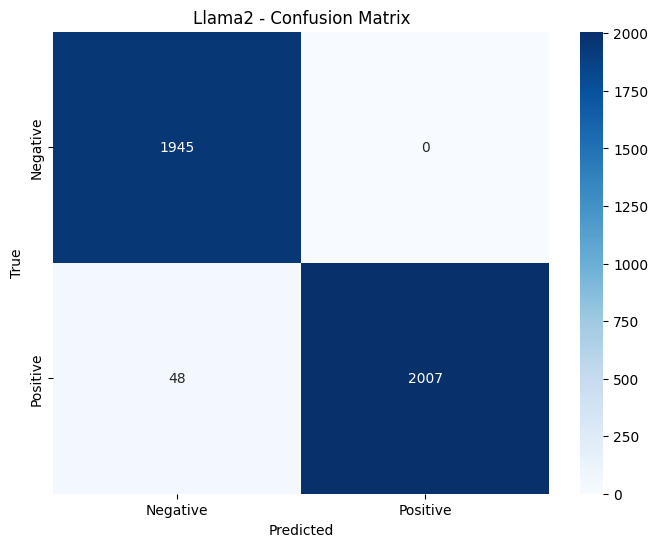

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_true_sentiments, valid_predicted_sentiments)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Llama2 - Confusion Matrix')
plt.show()